### Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃)

    - 0.8204: 일 최고 기온

In [1]:
import pandas as pd

m_df = pd.read_csv('./datasets/korea_mosquito.csv')
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [2]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [3]:
m_df.isna().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [4]:
m_df.duplicated().sum()

47

In [5]:
pre_m_df = m_df.drop_duplicates()
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [6]:
# 'date' 컬럼을 datetime 타입으로 변환
pre_m_df['date'] = pd.to_datetime(pre_m_df['date'])

# '년도', '월', '일'만 추출
pre_m_df['date'] = pre_m_df['date'].dt.date

C:\Users\user\AppData\Local\Temp\ipykernel_15852\3569650832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_m_df['date'] = pd.to_datetime(pre_m_df['date'])
C:\Users\user\AppData\Local\Temp\ipykernel_15852\3569650832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_m_df['date'] = pre_m_df['date'].dt.date


In [7]:
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [8]:
group_m_df = pre_m_df[['date', 'mosquito_Indicator']].groupby('date').sum('mosquito_Indicator').reset_index()
group_m_df

,date,mosquito_Indicator
0,2016-05-01,254.4
1,2016-05-02,273.5
2,2016-05-03,304.0
3,2016-05-04,256.2
4,2016-05-05,243.8
...,...,...
1290,2019-12-27,5.5
1291,2019-12-28,5.5
1292,2019-12-29,5.5
1293,2019-12-30,5.5


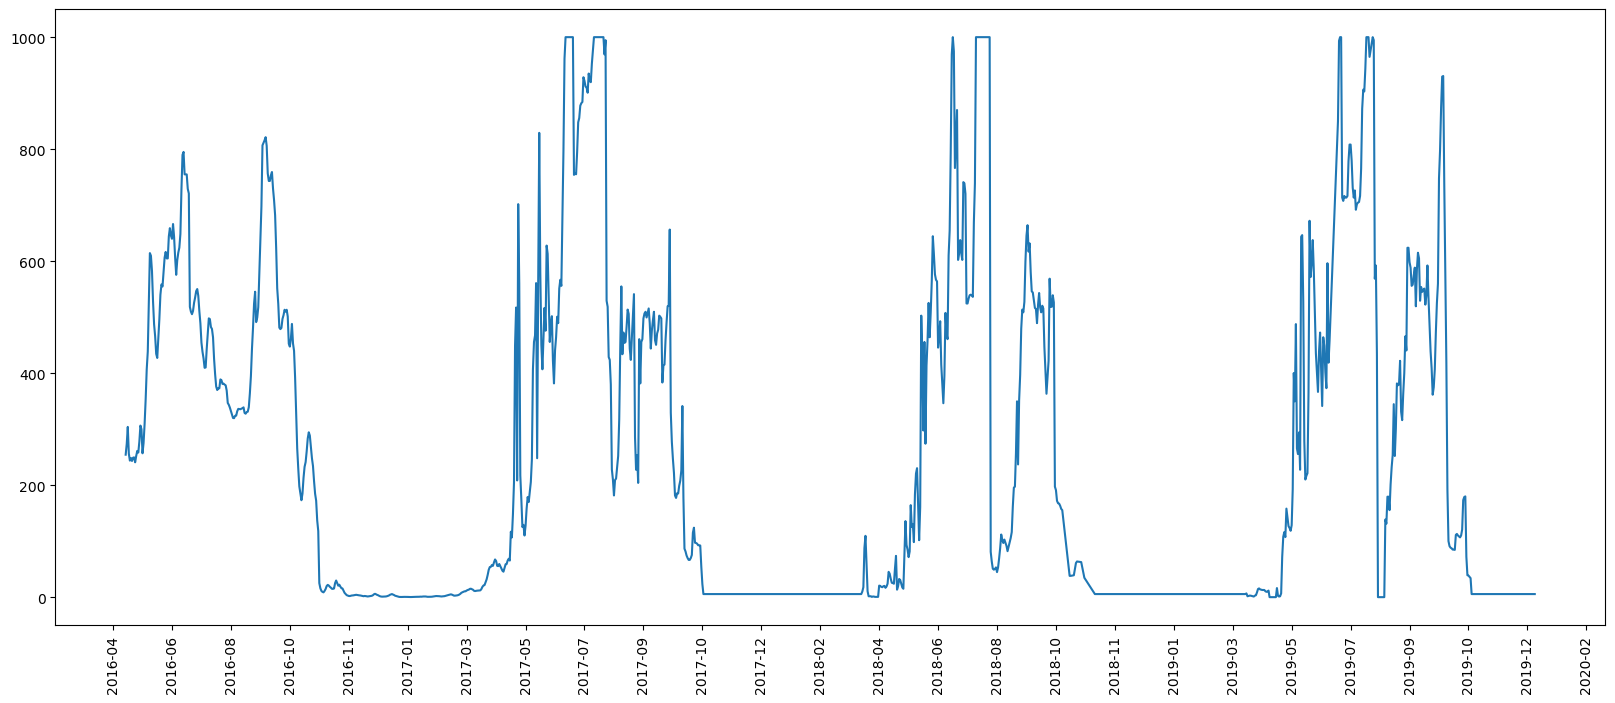

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))

date_format = mdates.DateFormatter('%Y-%m')

# 8주 단위
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
ax.xaxis.set_major_formatter(date_format)
ax.plot(group_m_df['date'], group_m_df['mosquito_Indicator'])
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'mosquito_Indicator'}>,
        <Axes: title={'center': 'rain(mm)'}>],
       [<Axes: title={'center': 'mean_T(℃)'}>,
        <Axes: title={'center': 'min_T(℃)'}>],
       [<Axes: title={'center': 'max_T(℃)'}>, <Axes: >]], dtype=object)

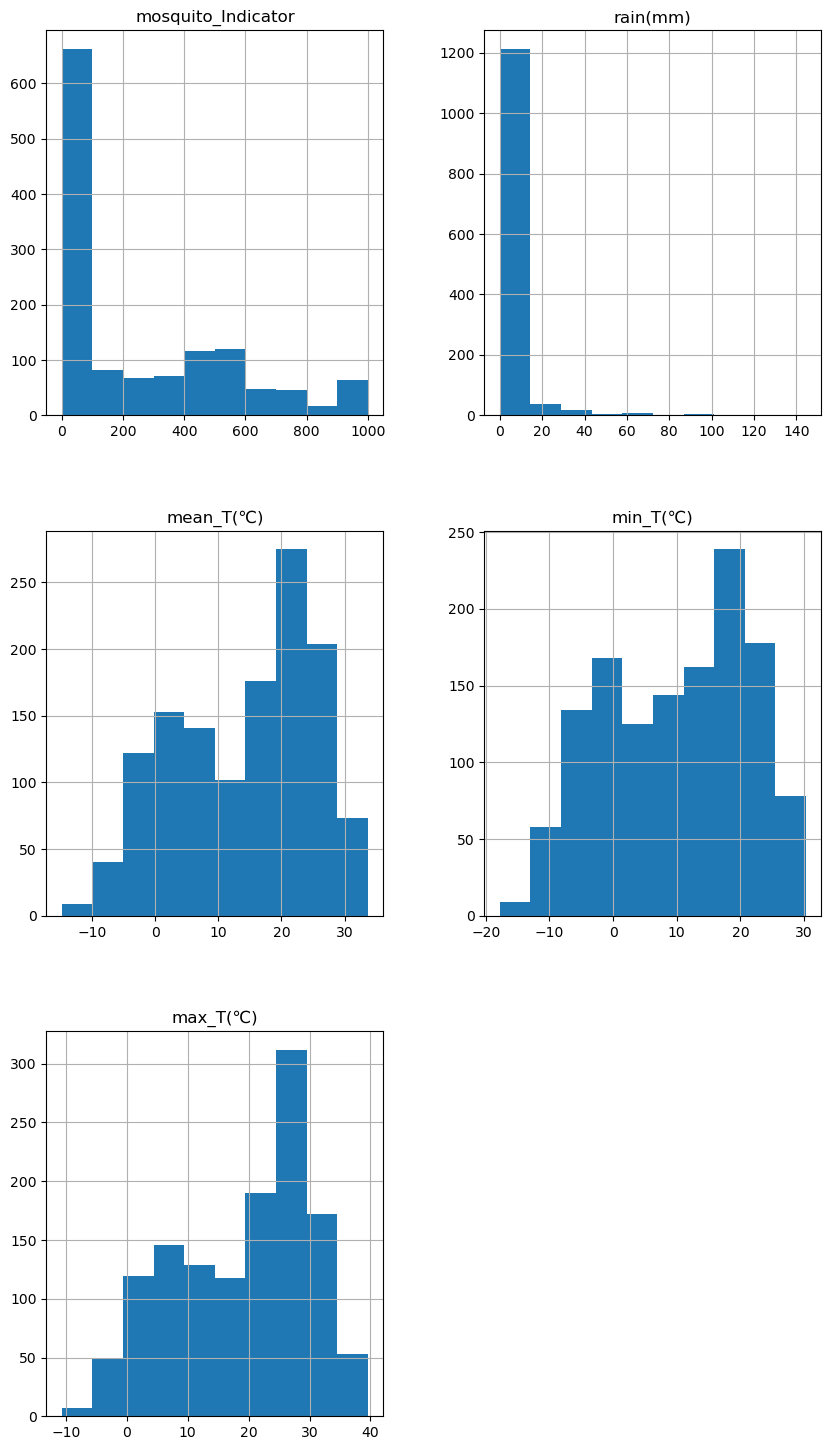

In [10]:
pre_m_df.hist(figsize=(10,18))

<Axes: >

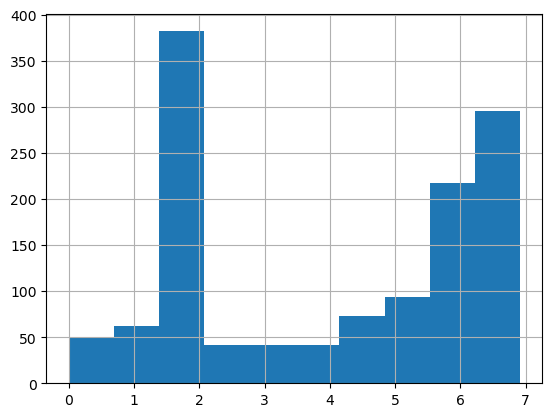

In [11]:
import numpy as np

np.log1p(pre_m_df['mosquito_Indicator']).hist()

In [12]:
(pre_m_df['mosquito_Indicator'] <= 0).sum()

14

In [13]:
pre_m_df = pre_m_df[pre_m_df['mosquito_Indicator']>= 0]

In [14]:
(pre_m_df['mosquito_Indicator'] <= 0).sum()

14

In [15]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, 2:], pre_m_df.iloc[:, 1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              902.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:17:43   Log-Likelihood:                         -8686.3
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1291   BIC:                                  1.740e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [17]:
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(℃)
2,200.659322,min_T(℃)
3,342.476613,max_T(℃)


In [18]:
pre_m_df = pre_m_df.drop(labels=['max_T(℃)','min_T(℃)'], axis =1)

In [19]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, 2:], pre_m_df.iloc[:, 1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              1725.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:17:43   Log-Likelihood:                         -8708.1
No. Observations:                1295   AIC:                                  1.742e+04
Df Residuals:                    1293   BIC:                                  1.743e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [21]:
get_vif(features)

,vif_score,feature
0,1.089713,rain(mm)
1,1.089713,mean_T(℃)


In [22]:
from sklearn.preprocessing import PowerTransformer

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_m_df[['mosquito_Indicator']])
pre_m_df['Target_yeo'] = result
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),Target_yeo
0,2016-05-01,254.4,0.0,18.8,6.571413
1,2016-05-02,273.5,16.5,21.1,6.672078
2,2016-05-03,304.0,27.0,12.9,6.819922
3,2016-05-04,256.2,0.0,15.7,6.581196
4,2016-05-05,243.8,7.5,18.9,6.512448
...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,1.980530
1338,2019-12-28,5.5,0.0,1.1,1.980530
1339,2019-12-29,5.5,1.4,3.8,1.980530
1340,2019-12-30,5.5,0.4,2.7,1.980530


array([[<Axes: title={'center': 'mosquito_Indicator'}>,
        <Axes: title={'center': 'rain(mm)'}>],
       [<Axes: title={'center': 'mean_T(℃)'}>,
        <Axes: title={'center': 'Target_yeo'}>]], dtype=object)

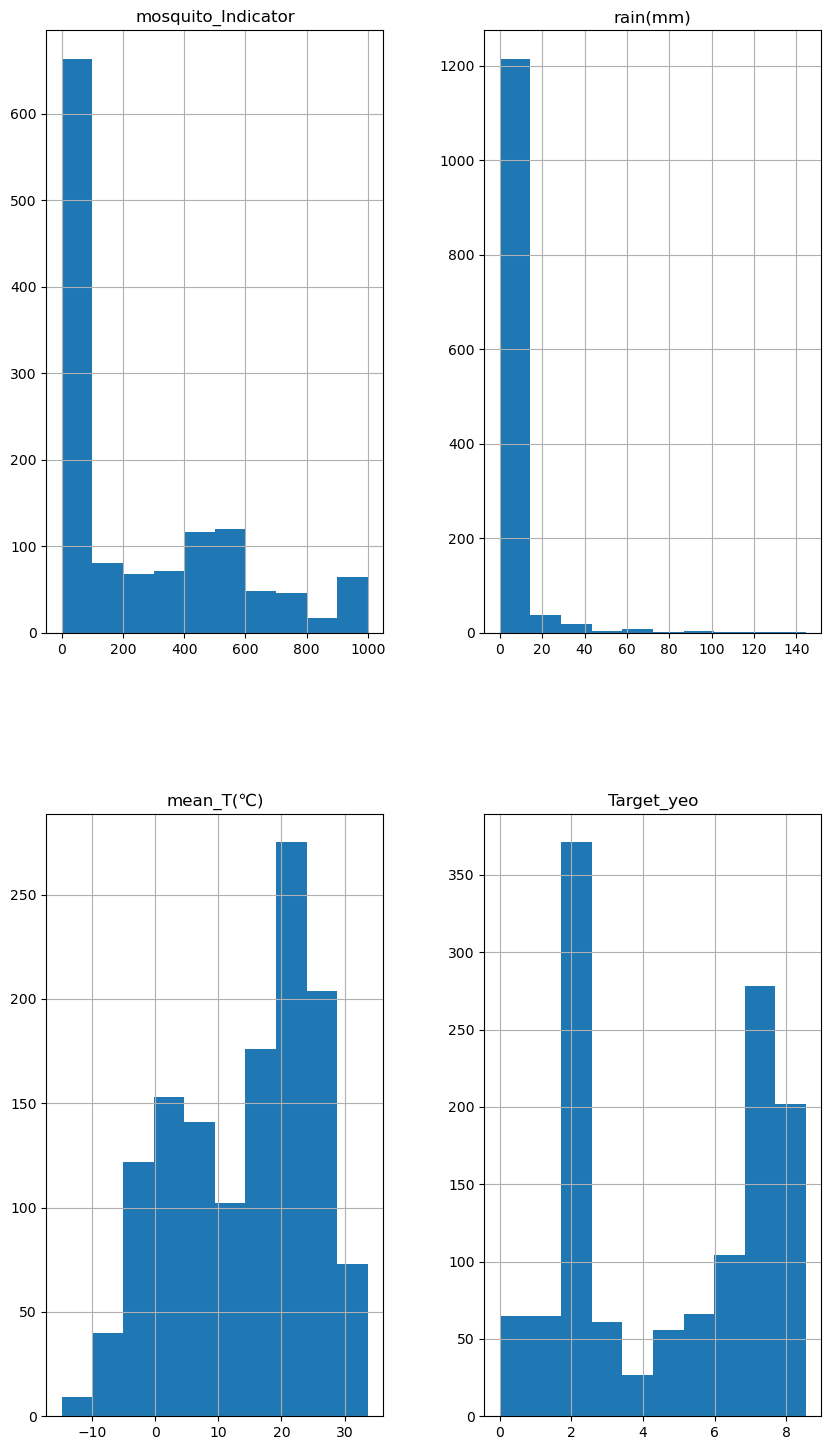

In [23]:
pre_m_df.hist(figsize=(10,18))

In [24]:
pre_m_df = pre_m_df.drop(labels=['mosquito_Indicator'], axis=1)
pre_m_df

,date,rain(mm),mean_T(℃),Target_yeo
0,2016-05-01,0.0,18.8,6.571413
1,2016-05-02,16.5,21.1,6.672078
2,2016-05-03,27.0,12.9,6.819922
3,2016-05-04,0.0,15.7,6.581196
4,2016-05-05,7.5,18.9,6.512448
...,...,...,...,...
1337,2019-12-27,0.0,-1.7,1.980530
1338,2019-12-28,0.0,1.1,1.980530
1339,2019-12-29,1.4,3.8,1.980530
1340,2019-12-30,0.4,2.7,1.980530


In [25]:
pre_m_df = pre_m_df.iloc[:,1:]
pre_m_df

,rain(mm),mean_T(℃),Target_yeo
0,0.0,18.8,6.571413
1,16.5,21.1,6.672078
2,27.0,12.9,6.819922
3,0.0,15.7,6.581196
4,7.5,18.9,6.512448
...,...,...,...
1337,0.0,-1.7,1.980530
1338,0.0,1.1,1.980530
1339,1.4,3.8,1.980530
1340,0.4,2.7,1.980530


In [26]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              5272.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:17:43   Log-Likelihood:                         -2602.0
No. Observations:                1295   AIC:                                      5208.
Df Residuals:                    1293   BIC:                                      5218.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [28]:
get_vif(features)

,vif_score,feature
0,1.089713,rain(mm)
1,1.089713,mean_T(℃)


In [29]:
pre_m_df.corr()['Target_yeo'].sort_values(ascending=False)[1:]

mean_T(℃)    0.843847
rain(mm)     0.170870
Name: Target_yeo, dtype: float64

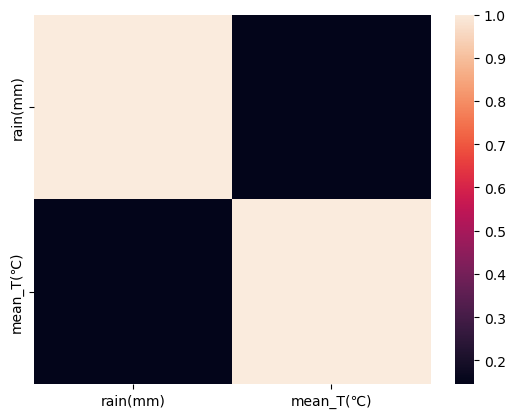

In [30]:
import seaborn as sns

sns.heatmap(features.corr())
plt.show()

In [31]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              5272.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:17:43   Log-Likelihood:                         -2602.0
No. Observations:                1295   AIC:                                      5208.
Df Residuals:                    1293   BIC:                                      5218.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
get_vif(features)

,vif_score,feature
0,1.089713,rain(mm)
1,1.089713,mean_T(℃)


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f},, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [35]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 2.4175, RMSE: 1.5548,, R2: 0.6831


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [37]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 1.4050, RMSE: 1.1853,, R2: 0.8158


In [38]:
pre_m_df = m_df.drop_duplicates()
pre_m_df = pre_m_df.reset_index(drop=True)

In [39]:
pre_m_df = pre_m_df.drop(labels=['date'],axis=1)
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1290,5.5,0.0,-1.7,-4.6,2.6
1291,5.5,0.0,1.1,-3.6,6.1
1292,5.5,1.4,3.8,1.1,6.2
1293,5.5,0.4,2.7,-5.7,6.8


In [40]:
pre_m_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_Indicator,1295.0,248.978069,294.867810,0.0,5.50,87.7,478.05,1000.0
rain(mm),1295.0,3.234903,12.302861,0.0,0.00,0.0,0.40,144.5
mean_T(℃),1295.0,14.137915,10.941415,-14.8,4.55,16.4,23.30,33.7
min_T(℃),1295.0,9.975367,11.100456,-17.8,0.30,11.3,19.50,30.3
max_T(℃),1295.0,19.078456,11.068348,-10.7,9.50,21.9,28.20,39.6


In [41]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_m_df)
std_pre_m_df = pd.DataFrame(result, columns=pre_m_df.columns)
std_pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,0.018395,-0.263041,0.426260,0.200487,0.625587
1,0.083195,1.078629,0.636552,0.588008,0.842506
2,0.186671,1.932419,-0.113184,-0.096913,-0.133627
3,0.024502,-0.263041,0.142823,0.020244,0.137521
4,-0.017567,0.346809,0.435403,0.020244,0.706932
...,...,...,...,...,...
1290,-0.826038,-0.263041,-1.448079,-1.313549,-1.489366
1291,-0.826038,-0.263041,-1.192072,-1.223428,-1.173027
1292,-0.826038,-0.149202,-0.945208,-0.799859,-1.163989
1293,-0.826038,-0.230515,-1.045782,-1.412683,-1.109759


In [42]:
condition = True

for column in std_pre_m_df.columns:
    condition &= std_pre_m_df[column].between(-1.96,1.96)
    std_pre_m_df = std_pre_m_df[condition]
    std_pre_m_df

C:\Users\user\AppData\Local\Temp\ipykernel_15852\1215269644.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  std_pre_m_df = std_pre_m_df[condition]
C:\Users\user\AppData\Local\Temp\ipykernel_15852\1215269644.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  std_pre_m_df = std_pre_m_df[condition]
C:\Users\user\AppData\Local\Temp\ipykernel_15852\1215269644.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  std_pre_m_df = std_pre_m_df[condition]
C:\Users\user\AppData\Local\Temp\ipykernel_15852\1215269644.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  std_pre_m_df = std_pre_m_df[condition]


In [43]:
pre_m_df = pre_m_df[pre_m_df.iloc[std_pre_m_df.index]].reset_index(drop=True)

ValueError: Boolean array expected for the condition, not object

In [ ]:
pre_m_df